# Load Dependencies

In [1]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [2]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)

C:\Users\asher\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# California Crime Trend From 2014-2017

In [3]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df = df.loc[only_year_2014_2017]

#select only California from the dataframe 
only_california = crime_df.loc[crime_df["State"] == "California", :]

#only_california.head()

#groupby the year
groupby_year = only_california.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014 = groupby_year["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014 = pd.DataFrame(crime_count_2014)

#reset the index
crime_count_2014 = crime_count_2014.reset_index()

crime_count_2014

,Year,Total Offender Count
0,2014,800
1,2015,839
2,2016,982
3,2017,1014


Text(0, 0.5, 'Year')

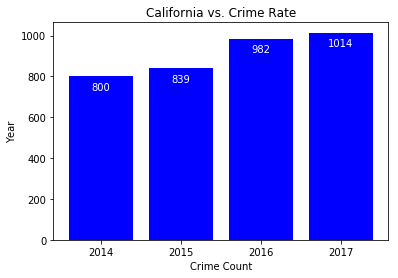

In [4]:
#set the x axis
years = (crime_count_2014["Year"])

#set the y axis
crime = (crime_count_2014["Total Offender Count"])

#plot the line graph for California 

bar_chart = plt.bar(years, crime, color="b", align="center")


def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 75
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')
        
label_function(bar_chart)

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("California vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")